In [1]:
import pandas as pd
import matplotlib.pyplot as plt

where is the stich controlling file, and how does it look like?

In [2]:
file_ctrl = "../spec/files/generation_script.csv"
df_ctrl = pd.read_csv(file_ctrl)
df_ctrl

,realization_name,Office_Cristina,UnivClass_Abby,PrimClass_Jaylin,UnivDorm_Chester,UnivLab_Andre,Office_Caleb,PrimClass_Jean,UnivClass_Alvin,UnivDorm_Cathalina,UnivLab_Allison
0,basic_scenario_dir,Office_Cristina,UnivClass_Abby,PrimClass_Jaylin,UnivDorm_Chester,UnivLab_Andre,Office_Caleb,PrimClass_Jean,UnivClass_Alvin,UnivDorm_Cathalina,UnivLab_Allison
1,building_id,1,1,1,1,1,1,1,1,1,1
2,default_scenario,Baseline,Baseline,Baseline,LED Only,Baseline,Baseline,Baseline,Baseline,Baseline,Baseline
3,start_date,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017,1/1/2017
4,end_date,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017,12/31/2017
5,scenario_name_1,"""LED Only""","""All Package""","""LED Only""",Baseline,"""LED Only""",NaN,"""LED Only""","""LED Only""","""LED Only""","""LED Only"""
6,active_after_1,3/1/2017,8/5/2017,3/25/2017,11/11/2017,1/2/2017,NaN,1/2/2017,1/2/2017,1/2/2017,1/2/2017
7,scenario_name_2,"""All Package""","""LED Only""","""All Package""","""All Package""","""All Package""",NaN,"""All Package""","""All Package""","""All Package""","""All Package"""
8,active_after_2,7/9/2017,11/9/2017,3/28/2017,12/12/2017,1/3/2017,NaN,1/3/2017,1/3/2017,1/3/2017,1/3/2017
9,scenario_name_3,NaN,NaN,NaN,NaN,"""LED Only""",NaN,"""LED Only""","""LED Only""","""LED Only""","""Cooling_System_SEER 14 Only"""


how to read files that contains timeseries data?
<br>
case 4 = baseline simulation results for UnivLab_Allison
<br>
case 5 = synthetic exporter applied with several measures for UnivLab_Allison

In [3]:
file_case4 = "Case4_Baseline_UnivLab_Allison.csv"
file_case5 = "Case5_UnivLab_Allison-10.csv"

In [4]:
df_case1 = pd.read_csv(file_case4)
df_case2 = pd.read_csv(file_case5, skiprows = 4)

what are column headers?

In [5]:
df_case1.columns

Index(['Electricity', 'Natural Gas', 'District Cooling', 'District Heating'], dtype='object')

In [6]:
df_case2.columns

Index(['Timestamp', 'Building_Id_1_Electricity_[J]',
       'Building_Id_1_NaturalGas_[J]', 'Scenario'],
      dtype='object')

how to combine all files into one data frame?

In [7]:
df_combined_elec = pd.DataFrame()
df_combined_ng = pd.DataFrame()

In [8]:
df_combined_elec.insert(0, 'Timestamp', df_case2.Timestamp)
df_combined_elec.insert(1, 'Baseline_elec', df_case1.Electricity)
df_combined_elec.insert(2, 'Stitched1_elec', df_case2["Building_Id_1_Electricity_[J]"])
df_combined_ng.insert(0, 'Timestamp', df_case2.Timestamp)
df_combined_ng.insert(1, 'Baseline_ng', df_case1["Natural Gas"])
df_combined_ng.insert(2, 'Stitched1_ng', df_case2["Building_Id_1_NaturalGas_[J]"])

In [9]:
df_combined_elec

,Timestamp,Baseline_elec,Stitched1_elec
0,01/01/2017 00:00,1.185362e+07,1.185362e+07
1,01/01/2017 01:00,1.259670e+07,1.259670e+07
2,01/01/2017 02:00,1.036606e+07,1.036606e+07
3,01/01/2017 03:00,1.260137e+07,1.260137e+07
4,01/01/2017 04:00,1.259876e+07,1.259876e+07
5,01/01/2017 05:00,1.228122e+07,1.228122e+07
6,01/01/2017 06:00,1.558187e+07,1.558187e+07
7,01/01/2017 07:00,2.264945e+07,2.264945e+07
8,01/01/2017 08:00,3.912880e+07,3.912880e+07
9,01/01/2017 09:00,3.943398e+07,3.943398e+07


how to set Timestamp column as index column?

In [10]:
df_combined_elec["Timestamp"] = pd.to_datetime(df_combined_elec["Timestamp"])
df_combined_ng["Timestamp"] = pd.to_datetime(df_combined_ng["Timestamp"])

In [11]:
df_combined_elec.index = df_combined_elec["Timestamp"]
del df_combined_elec["Timestamp"]

In [12]:
df_combined_ng.index = df_combined_ng["Timestamp"]
del df_combined_ng["Timestamp"]

how to ploy the entire simulation period?

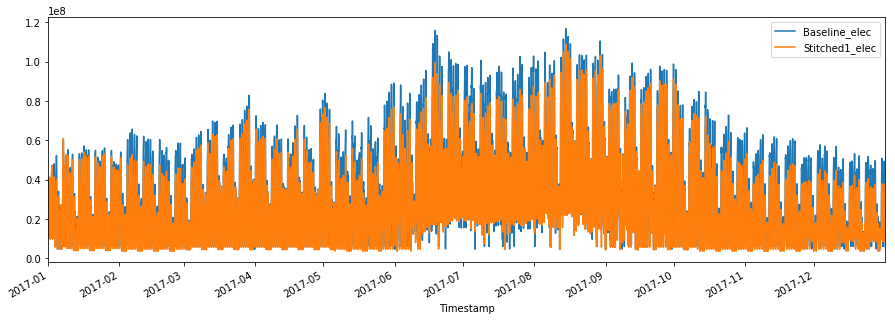

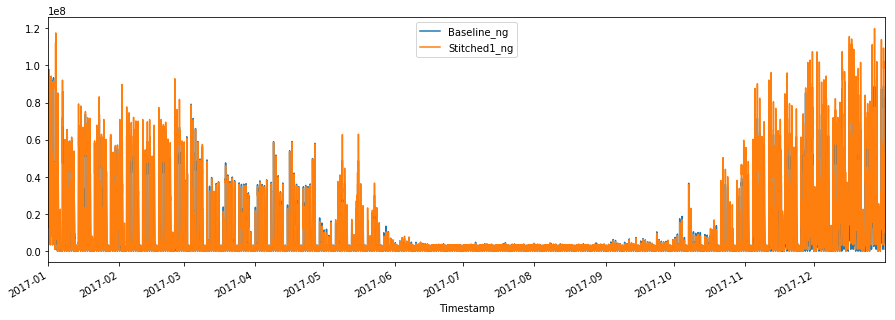

In [13]:
df_combined_elec.plot(figsize=(15,5))
df_combined_ng.plot(figsize=(15,5))

how to plot certain time period? for "LED only" scenario.

In [14]:
df_filtered_elec = df_combined_elec['1/1/2017':'1/5/2017']
df_filtered_ng = df_combined_ng['1/1/2017':'1/5/2017']

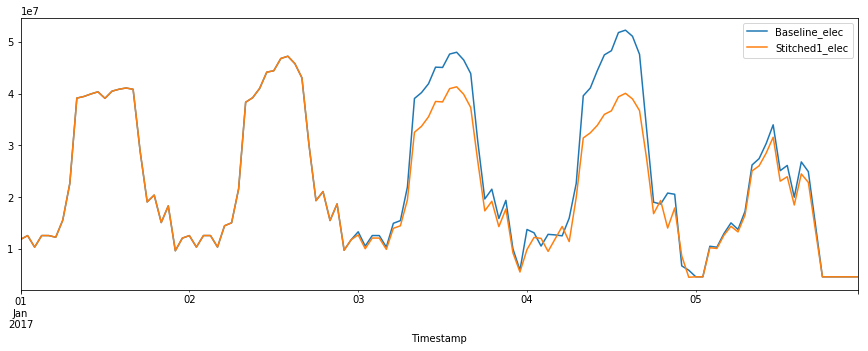

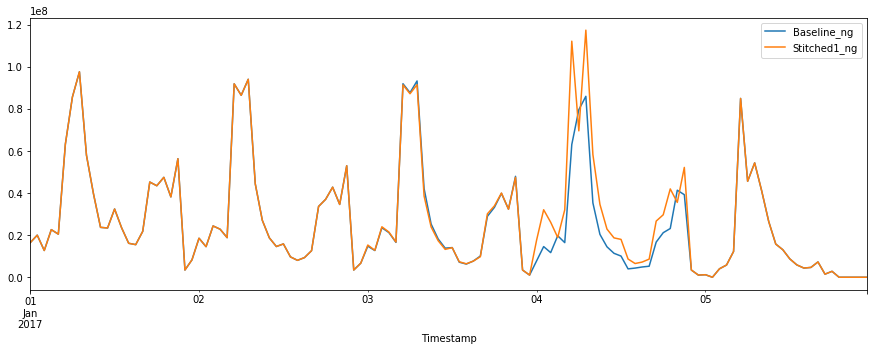

In [15]:
df_filtered_elec.plot(figsize=(15,5))
df_filtered_ng.plot(figsize=(15,5))